In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from collections import Counter
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [75]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')

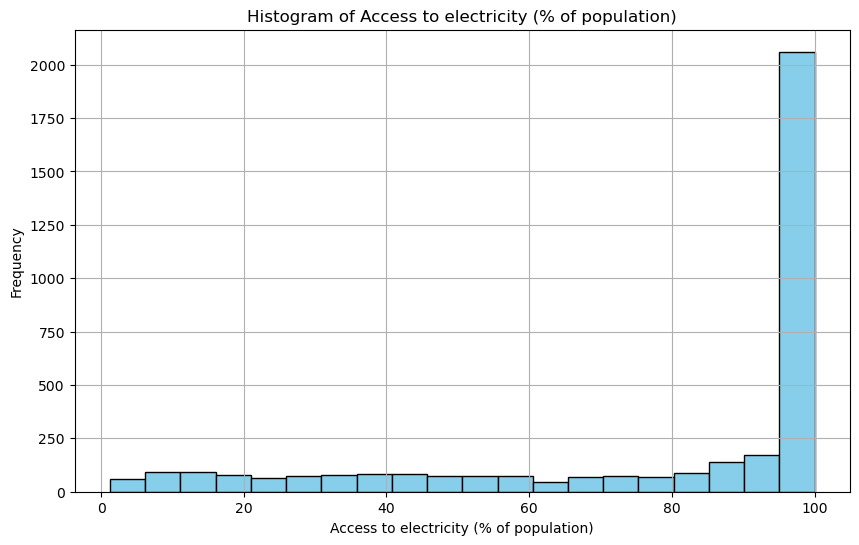

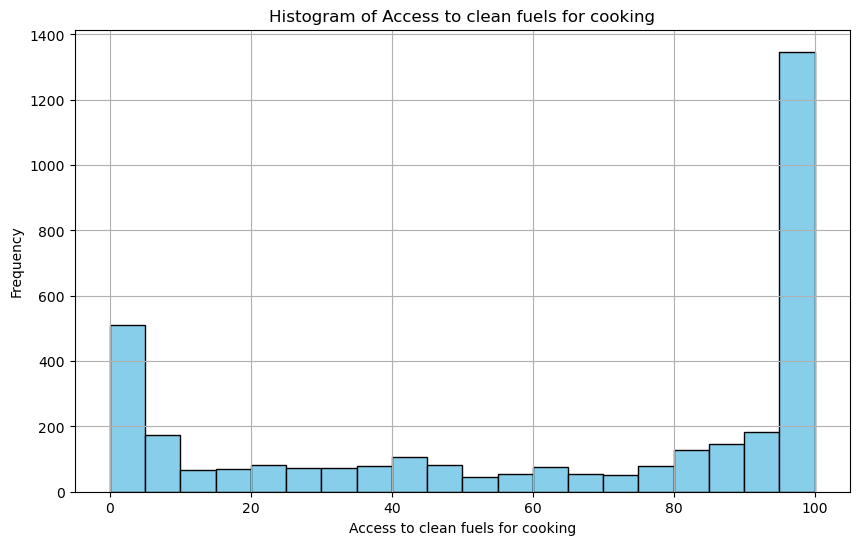

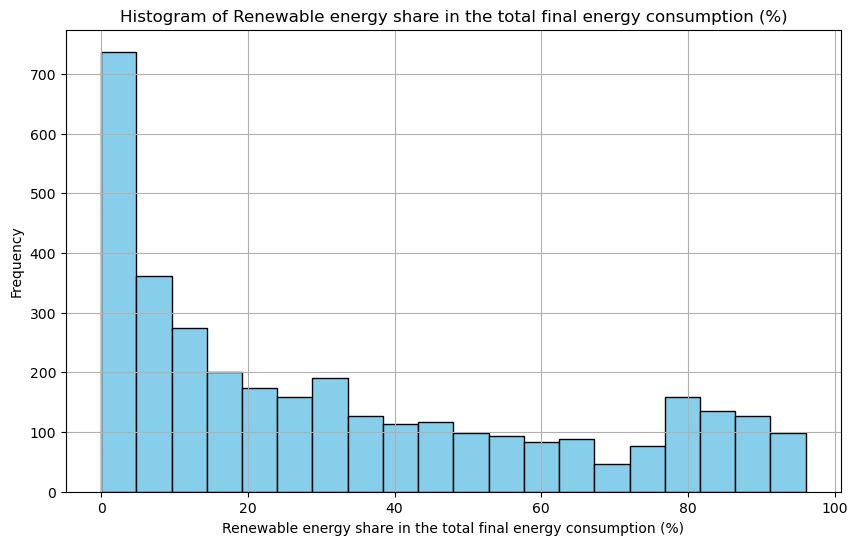

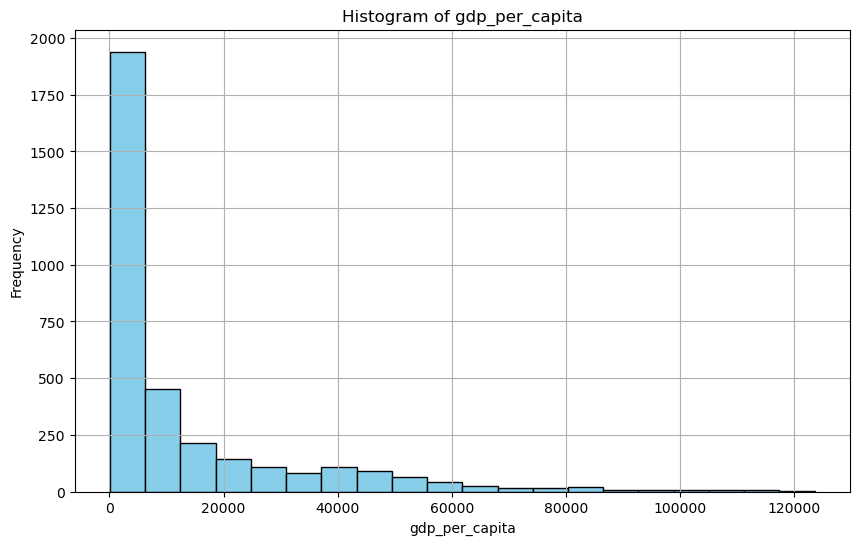

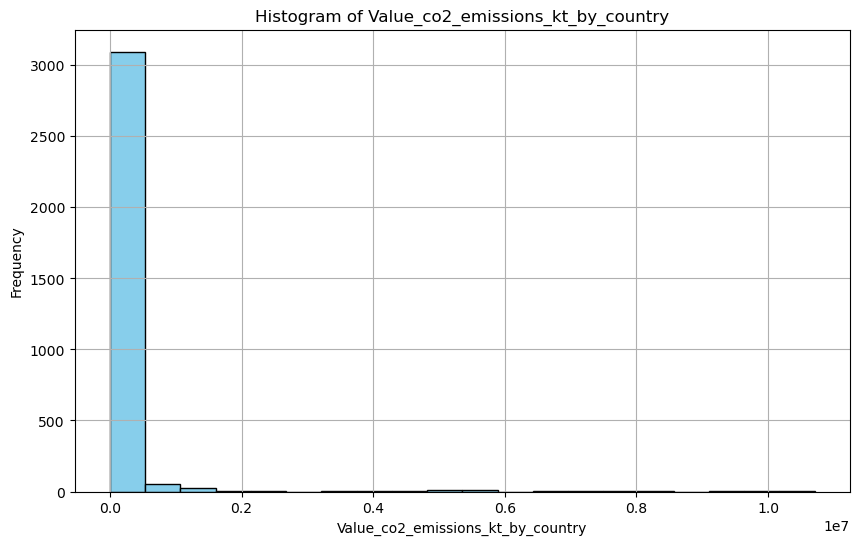

In [76]:
# List of variable names
variables = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'gdp_per_capita',
    'Value_co2_emissions_kt_by_country'
]

# Create histograms for each variable
for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [77]:
# List of variable names
variables = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'gdp_per_capita',
    'Value_co2_emissions_kt_by_country'
    # Add other variable names here
]

# Calculate and display statistics for each variable
for var in variables:
    mean = df[var].mean()
    mode = df[var].mode()[0]  # If multiple modes exist, the first one is selected
    std_dev = df[var].std()
    skewness = df[var].skew()

    print(f"Variable: {var}")
    print(f"Mean: {mean:.2f}")
    print(f"Mode: {mode:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print("\n")

Variable: Access to electricity (% of population)
Mean: 78.93
Mode: 100.00
Standard Deviation: 30.28
Skewness: -1.21


Variable: Access to clean fuels for cooking
Mean: 63.26
Mode: 100.00
Standard Deviation: 39.04
Skewness: -0.51


Variable: Renewable energy share in the total final energy consumption (%)
Mean: 32.64
Mode: 0.00
Standard Deviation: 29.89
Skewness: 0.67


Variable: gdp_per_capita
Mean: 13283.77
Mode: 111.93
Standard Deviation: 19709.87
Skewness: 2.36


Variable: Value_co2_emissions_kt_by_country
Mean: 159866.46
Mode: 10.00
Standard Deviation: 773661.06
Skewness: 9.34




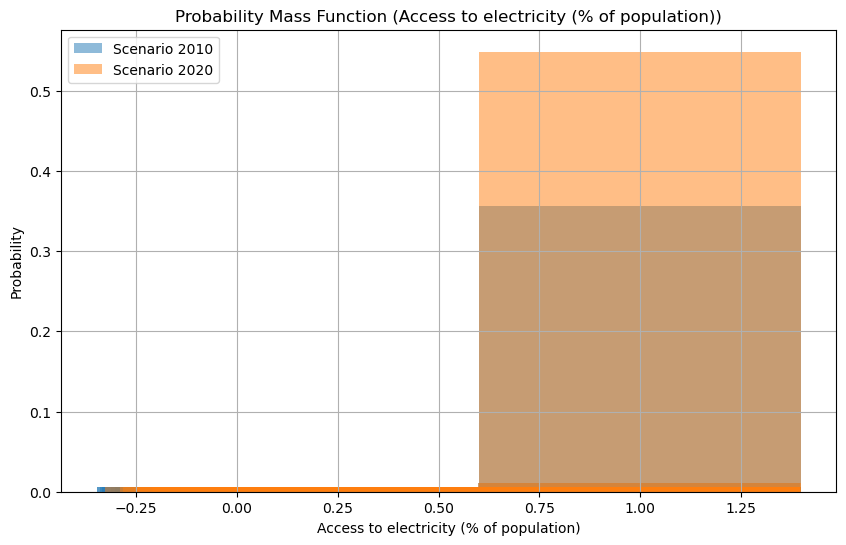

In [78]:
# Choose the variable for comparison
variable_to_compare = 'Access to electricity (% of population)'

# Choose two scenarios (for example, two years)
scenario1 = 2010
scenario2 = 2020

# Filter the data for the two scenarios
data_scenario1 = df[df['Year'] == scenario1]
data_scenario2 = df[df['Year'] == scenario2]

# Calculate the PMF for each scenario
pmf_scenario1 = Counter(data_scenario1[variable_to_compare] / 100)
pmf_scenario2 = Counter(data_scenario2[variable_to_compare] / 100)

# Convert PMFs to probabilities
total_scenario1 = len(data_scenario1)
total_scenario2 = len(data_scenario2)

for value, count in pmf_scenario1.items():
    pmf_scenario1[value] = count / total_scenario1

for value, count in pmf_scenario2.items():
    pmf_scenario2[value] = count / total_scenario2

# Plot the PMFs for comparison
plt.figure(figsize=(10, 6))
plt.bar(pmf_scenario1.keys(), pmf_scenario1.values(), alpha=0.5, label=f'Scenario {scenario1}')
plt.bar(pmf_scenario2.keys(), pmf_scenario2.values(), alpha=0.5, label=f'Scenario {scenario2}')
plt.title(f'Probability Mass Function ({variable_to_compare})')
plt.xlabel(variable_to_compare)
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


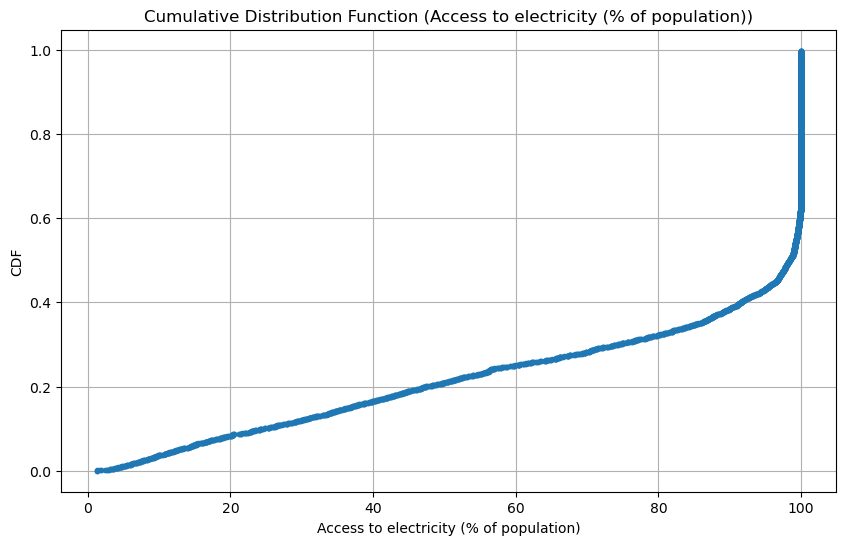

In [79]:
# Choose the variable for which you want to create the CDF
variable_for_cdf = 'Access to electricity (% of population)'

# Sort the data for the chosen variable
sorted_data = np.sort(df[variable_for_cdf])

# Calculate the cumulative probabilities
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title(f'Cumulative Distribution Function ({variable_for_cdf})')
plt.xlabel(variable_for_cdf)
plt.ylabel('CDF')
plt.grid(True)
plt.show()


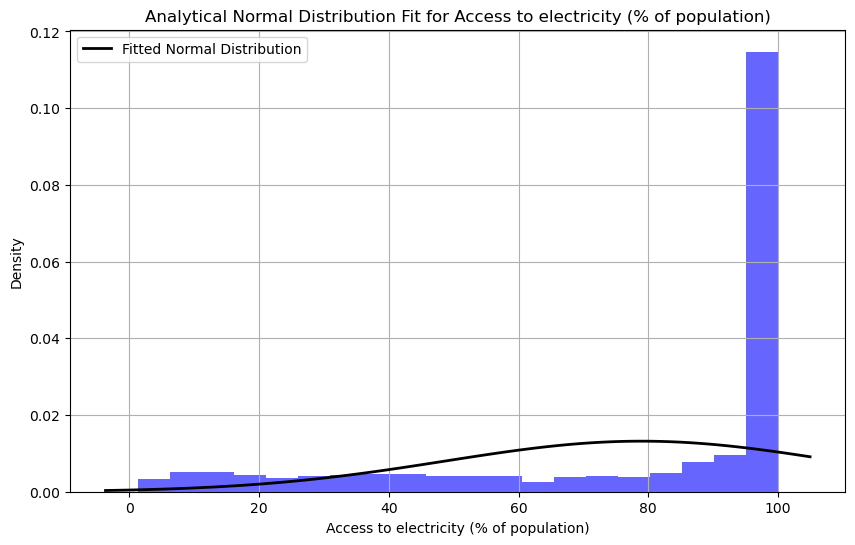

In [80]:
# Choose the variable for which you want to analyze the Normal distribution
variable_for_distribution = 'Access to electricity (% of population)'

# Extract the data for the chosen variable and remove missing values
data_for_distribution = df[variable_for_distribution].dropna()

# Fit a Normal distribution to the data
mu, sigma = norm.fit(data_for_distribution)

# Create a histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data_for_distribution, bins=20, density=True, alpha=0.6, color='b')

# Plot the fitted Normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.title(f'Analytical Normal Distribution Fit for {variable_for_distribution}')
plt.xlabel(variable_for_distribution)
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


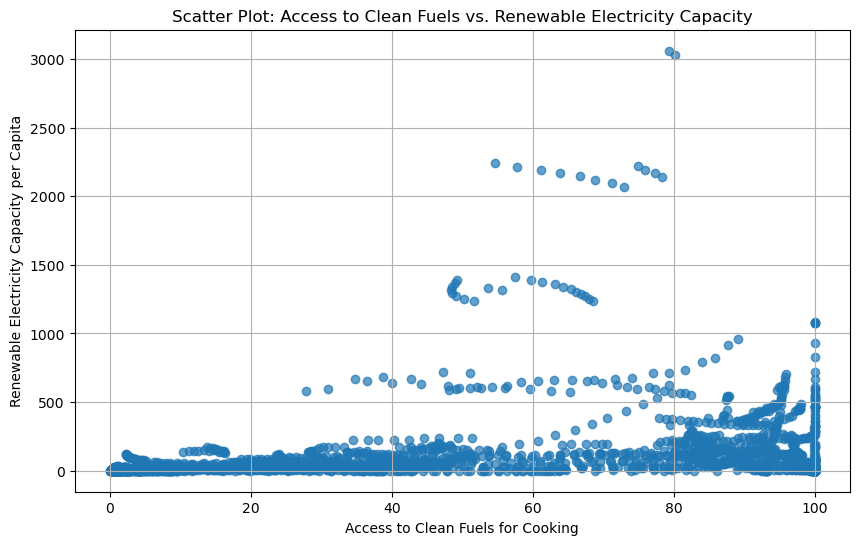

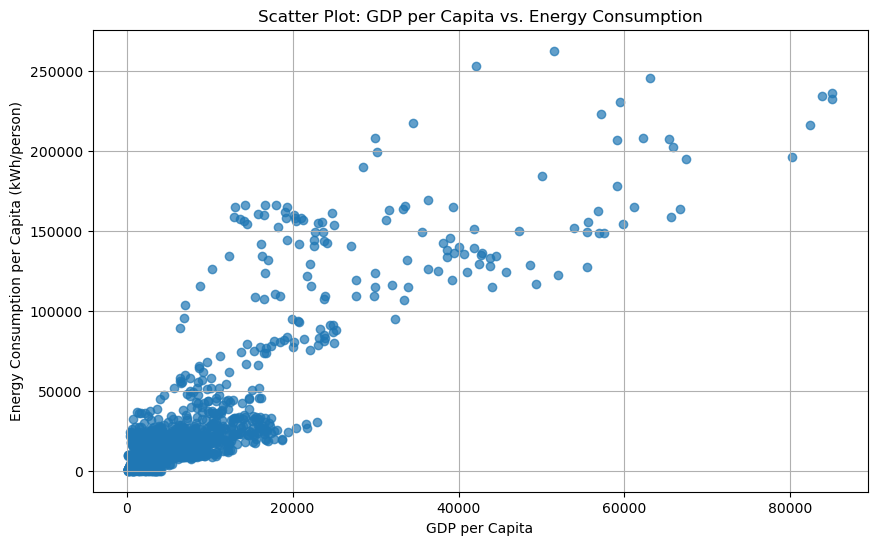

Pearson's correlation coefficient (Access to Clean Fuels vs. Renewable Electricity Capacity): 0.25
Pearson's correlation coefficient (GDP per Capita vs. Energy Consumption): 0.88


In [81]:

# Choose the variables for comparison
variable1 = 'Access to clean fuels for cooking'
variable2 = 'Renewable-electricity-generating-capacity-per-capita'
variable3 = 'gdp_per_capita'
variable4 = 'Primary energy consumption per capita (kWh/person)'

# Extract data for the chosen variables and drop missing/invalid values
data_filtered = df[[variable1, variable2, variable3, variable4]].dropna()

# Scatter plot 1: Access to clean fuels vs. Renewable electricity capacity
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered[variable1], data_filtered[variable2], alpha=0.7)
plt.title('Scatter Plot: Access to Clean Fuels vs. Renewable Electricity Capacity')
plt.xlabel('Access to Clean Fuels for Cooking')
plt.ylabel('Renewable Electricity Capacity per Capita')
plt.grid(True)
plt.show()

# Scatter plot 2: GDP per capita vs. Energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered[variable3], data_filtered[variable4], alpha=0.7)
plt.title('Scatter Plot: GDP per Capita vs. Energy Consumption')
plt.xlabel('GDP per Capita')
plt.ylabel('Energy Consumption per Capita (kWh/person)')
plt.grid(True)
plt.show()

# Calculate Pearson's correlation coefficients
correlation1, _ = pearsonr(data_filtered[variable1], data_filtered[variable2])
correlation2, _ = pearsonr(data_filtered[variable3], data_filtered[variable4])

print(f"Pearson's correlation coefficient (Access to Clean Fuels vs. Renewable Electricity Capacity): {correlation1:.2f}")
print(f"Pearson's correlation coefficient (GDP per Capita vs. Energy Consumption): {correlation2:.2f}")

In [82]:
# Choose the variable for comparison
variable_for_comparison = 'Access to electricity (% of population)'

# Choose the years for the two scenarios
year_before = 2008
year_after = 2020

# Extract data for the two scenarios
data_before = df[df['Year'] == year_before][variable_for_comparison]
data_after = df[df['Year'] == year_after][variable_for_comparison]

# Perform the t-test for independent samples
t_statistic, p_value = ttest_ind(data_before, data_after, equal_var=False)

# Define the significance level
alpha = 0.05

# Interpret the results
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two scenarios.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two scenarios.")


t-statistic: -2.67
p-value: 0.0081
Reject the null hypothesis: There is a significant difference between the two scenarios.


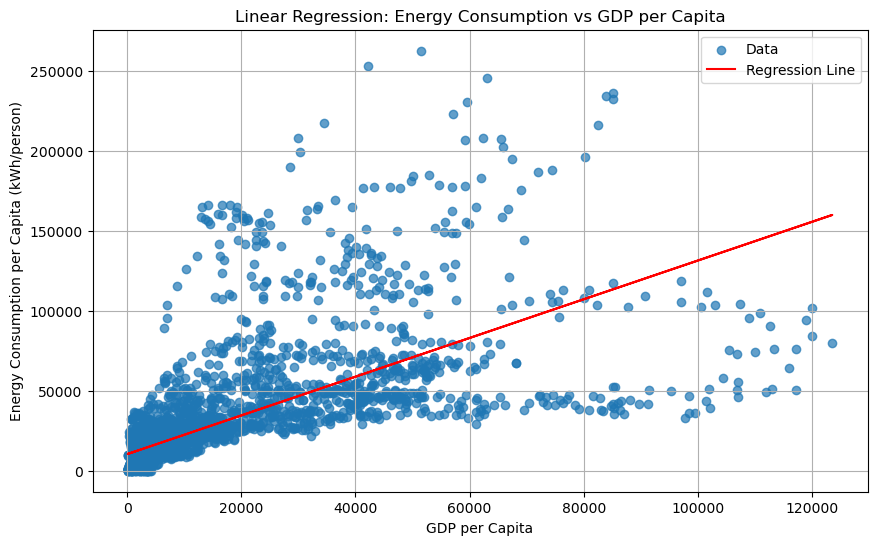

In [83]:
# Choose the dependent and explanatory variables
dependent_variable = 'Primary energy consumption per capita (kWh/person)'
explanatory_variable = 'gdp_per_capita'

# Extract data for the chosen variables and drop missing/invalid values
data_filtered = df[[dependent_variable, explanatory_variable]].dropna()

# Separate the dependent and explanatory variables
X = data_filtered[explanatory_variable]
y = data_filtered[dependent_variable]

# Add a constant term to the predictor
X = sm.add_constant(X)

# Perform the linear regression analysis
model = sm.OLS(y, X).fit()

# Get the regression coefficients
intercept, slope = model.params

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X[explanatory_variable], y, alpha=0.7, label='Data')
plt.plot(X[explanatory_variable], intercept + slope * X[explanatory_variable], color='red', label='Regression Line')
plt.title('Linear Regression: Energy Consumption vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Energy Consumption per Capita (kWh/person)')
plt.legend()
plt.grid(True)
plt.show()